### AOS 575 Application Lab 2 - aos575_applab2_AR1_NSTAR.ipynb
Written by Jennifer Kay (CU), Elizabeth Maroon (CU), and Hannah Zanowski (CU), last updated Sept 23, 2020 <br>
Updated for AOS 575 by Elizabeth Maroon (UW); switched to truax dataset, Sept 29, 2020 <br>

#### Learning Goals
1) Calculate the autocorrelation at a range of lags using two methods available in python (np.correlate, dot products) <br>
2) Estimate the effective sample size ($N^{*}$) using the lag-1 autocorrelation <br>
3) Evaluate the influence of changing the sampling frequency on the autocorrelation and on ($N^{*}$). <br>


#### Data and Underlying Science: 

Here, you will analyze memory in the 2019 weather observations from Truax Field (Madison's airport). These observations were sampled hourly. The notebook is initially set up to subsample daily (at midnight) and to analyze air temperature, but can be edited to examine other variables in the truax_2019.csv dataset. 

Import packages to be used here:

In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd   ##pandas reads in .csv.
from scipy import stats
import seaborn as sns  ### seaborn just makes things pretty -- no new typing
sns.set_style('whitegrid')  ###  change away from grey grid (seaborn default) to white grid

Read in the data:

In [22]:
filename = 'truax_2019.csv'
data=pd.read_csv(filename,sep=',')
data.head()

,year,month,day,hour,airtemp_degc,dewpoint_degc,slp_hpa,winddir_degrees,windspeed_ms,skycond_oktas,liqprec_mm
0,2019,1,1,0,-0.6,-1.1,1007.0,350.0,6.2,8.0,NaN
1,2019,1,1,1,-1.1,-1.7,1008.4,340.0,4.1,NaN,0.3
2,2019,1,1,2,-1.1,-2.2,1009.6,350.0,5.1,NaN,0.5
3,2019,1,1,3,-1.1,-2.2,1011.4,340.0,4.1,NaN,0.5
4,2019,1,1,4,-1.1,-2.2,1013.4,340.0,4.1,NaN,-0.1


#### Plot your initial data

Plot midnight temperature data for Madison, Wisconsin

minimum data value:  -31.7
maximum data value:  32.2


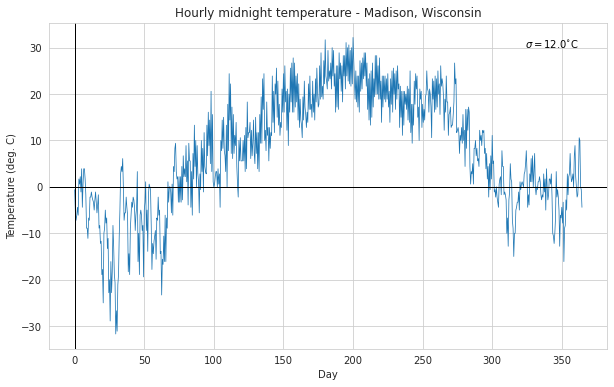

In [31]:
X=data['airtemp_degc']
X_daily=X[0::12] ## sample the hourly data every 24 hours; the 0 indicates the midnight entry
print('minimum data value: ',X_daily.min())
print('maximum data value: ',X_daily.max())

xindex = (np.arange(0,np.size(X),1))/24
xindex_daily=xindex[0::12] ## sample the index every 24 hours

#make plot
f=plt.figure(figsize=(10,6))
plt.plot(xindex_daily, X_daily, linewidth = 0.75)
v = np.std(X_daily)
plt.text(0.95, 0.925,'$\sigma = $' + str(np.round(v)) + '$^{\circ}$C', ha='right', transform=plt.gca().transAxes, color = 'k')
ymin, ymax = plt.ylim();
xmin, xmax = plt.xlim();
lines = plt.plot((xmin, xmax),(0, 0),(0, 0),(ymin, ymax));
plt.setp(lines,color='black', linewidth=1);
plt.ylim((ymin, ymax));
plt.xlim((xmin, xmax));
plt.ylabel('Temperature (deg. C)');
plt.xlabel('Day');
plt.title('Hourly midnight temperature - Madison, Wisconsin');

#### 1. Find the lag-one autocorrelation (AR1). 

We are going to use two different methods, np.correlate() and using np.dot (dot products). Equation numbers are provided to compare to the Barnes notes. 

In [40]:
tseries=X_daily
sigma=np.std(tseries)  ## calculate the standard deviation
mean=np.mean(tseries)  ## calculate the mean
n=len(tseries)         ## calculate the length of the timeseries
lag=1                  ## warning: you cannot change this to be a negative lag. 
                       ## this cell does not work for negative lags - Can you see why?

## remove the mean
tseries1=tseries-mean

##Create two timeseries of the data at t=t1 and t=t2
t1_m=tseries1[0:-1*lag]  
t2_m=tseries1[lag:]
#print(t1_m.shape)
#print(t2_m.shape)



Method 1: np.correlate()

In [41]:
#Calculate the autocorrelation using numpy correlate lagN
lagNauto_np=np.correlate(t1_m,t2_m,mode='valid')/(n-lag)/(sigma**2)
print('lag',lag,'autocorrelation np.correlate:',np.round(lagNauto_np[0],3))


lag 1 autocorrelation np.correlate: 0.865


Method 2: direct calculation via dot product

In [34]:
#direct calculation
#Calculate the autocorrelation using numpy dot
## (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html)
lagNauto=np.dot(t1_m,t2_m)/(n-lag)/sigma**2 ## Barnes Chapter 2 Eq. 68 divided by the variance
print('lag',lag,'autocorrelation direct calc:',np.round(lagNauto,3))

if lag==1: alpha=lagNauto

lag 1 autocorrelation direct calc: 0.865


Do you get the same autocorrelation for the two calculations of autocorrelation? What is it? Is it high or low? Are you surprised by this magnitude?

Your answer here.

#### 2. Calculate the autocorrelation at all lags

Calculate the autocorrelation at all lags. Is it symmetric about 0 lag? Should it be? 

Your answer here.

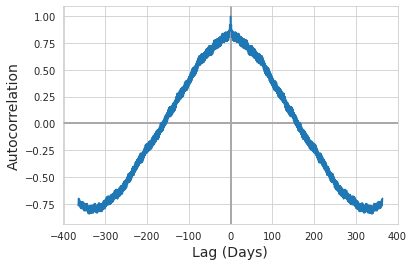

In [39]:
tseries1=tseries-mean
half=int(len(tseries)/2)
lags=np.arange(-1*half,half+0.01,1.)
#print(len(tseries1))
#print(len(lags))
#print(len(np.correlate(tseries1,tseries1,mode='same')))

autocorrelation_function=np.correlate(tseries1,tseries1,mode='same')/((n-np.abs(lags))*sigma**2)  ##Barnes Eq. 67 divided by variance

plt.axhline(0,color='darkgray',linewidth=2)
plt.axvline(0,color='darkgray',linewidth=2)
plt.plot(lags,autocorrelation_function)
#plt.xlim([-40,40]);
#plt.ylim([0.0,1.0]);
plt.xlabel('Lag (Days)',fontsize=14);
plt.ylabel('Autocorrelation',fontsize=14);


How does the autocorrelation change as lag increases from -40 to +40 days?  When is autocorrelation negative? Why is the autocorrelation negative then?

Your answer here.

#### 3. Calculate the effective sample size (N$^{*}$) for this dataset

Compare your estimate of the number of independent samples (N$^{*}$) to the number of samples in the original dataset (N)

In [28]:
N=len(tseries)
print('# samples, N: ',N)
print('lag-1 autocorrelation: ',round(alpha,2))
print('#independent samples, N*: ',round((1-np.abs(alpha))/(1+np.abs(alpha))*N,0)) ## Chapter 2 Barnes Eq. 88
## Note that the value of the autocorrelation used in Eq. 88 should be the absolute value otherwise
## if alpha is negative you end up with more independent samples than original samples

# samples, N:  365
lag-1 autocorrelation:  0.94
#independent samples, N*:  12.0


How much memory is there in daily temperature sampled at midnight? How many truly independent samples are there?

Your answer here

#### 4. Time to tinker
Make minor adjustments to the original code to see how results change. <br>

Repeat steps 1-3 when you change to a different sampling frequency (e.g., every 6 hours, every 7 days, every month). How do the results change? How do results change if you switch variables (e.g., slp_hpa, dewpoint_degc, etc.)?  <br>

Hint: You might want to make a copy of the notebook for your tinkering so that you can refer back to your original answers more easily.

Ignore below unless you're really interested in determining exactly what np.correlate(mode='full') is doing.

Text(0.5, 0, 'lags (days)')

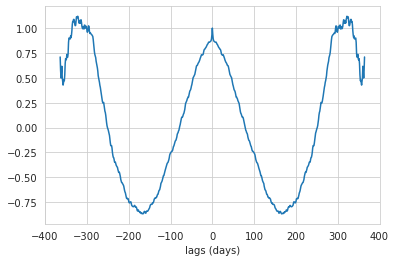

In [29]:
## Unsolved mystery -- If you want to plot the full autocorrrelation (i.e., vs. all lags)
## You end up with values greater than 1.  But the autocorrelation should be between -1 and 1

lags_full=np.arange(-n,n+1);
foo=np.correlate(tseries1,tseries1,mode='full')/((n-np.abs(lags_full[1:-1]))*sigma**2);
plt.plot(lags_full[1:-1],foo);
plt.xlabel('lags (days)')

##Elizabeth idea: check out Wilks pp58-59. Does it have to do with the sigma+sigma- ~sigma^2 approximation?